In [1]:
import sys
sys.path.insert(0, "../../python")

import os
import numpy as np
from vsim import plot
from vsim import load
from vsim import analyze
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('notes')
from scipy.optimize import curve_fit
import scipy.constants as const
e = const.physical_constants['elementary charge'][0]
me = const.physical_constants['electron mass energy equivalent in MeV'][0]
c = const.physical_constants['speed of light in vacuum'][0]

pathPre = '/mnt/md0/VSim/ICL_Witness_Beam/'
simName = 'AccelGradient'

Start: 179.20, End: 56.00, Length:123.20
Bottom: 55.47, Top: 144.53, Width:89.05
Wake size in the original plasma, Length: 118.8, Width: 85.4
Beam is denser than original simulation


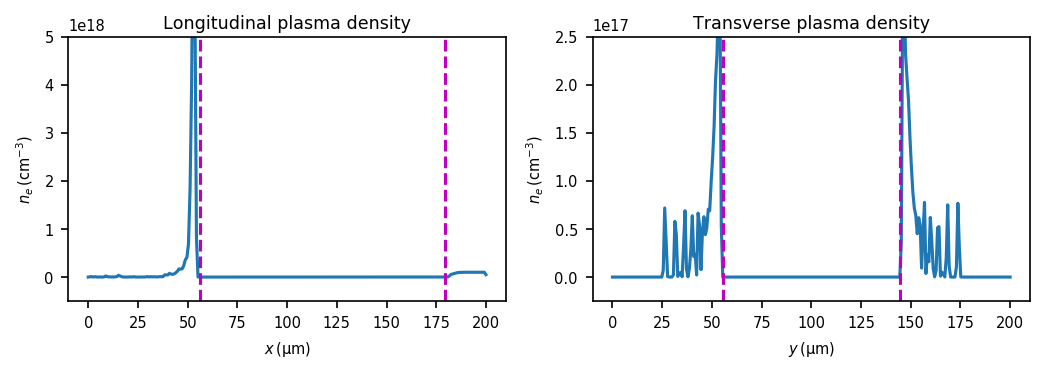

In [2]:
# Plotting the plasma density
path = pathPre + '1e17_100umPlasma/'
rho, rhoAttrs = load.load_field(path, simName, 'rhoPlasma')
Nx, Ny, Nz = analyze.get_shape(rho[5])
rhoX = -rho[5][:, int(Ny+1)/2, int(Nz+1)/2, 0]/e/1e6
rhoY = -rho[5][175, :, int(Nz+1)/2, 0]/e/1e6
x = np.linspace(0, 200, Nx)
y = np.linspace(0, 200, Ny)

def find_length(rhoX, x, Nx, eps):
    for i in range(Nx-1, -1, -1):
        if rhoX[i] >= eps and rhoX[i-1] < eps:
            start = x[i-1]
        if rhoX[i] <= eps and rhoX[i-1] > eps:
            end = x[i]
            return start, end
length = find_length(rhoX, x, Nx, 1e6)
print('Start: %0.2f, End: %0.2f, Length:%0.2f' % (length[0], length[1], length[0]-length[1]))

def find_width(rhoY, y, Ny, eps):
    for i in range(int(Ny/4), int(3*Ny/4)):
        if rhoY[i] >= eps and rhoY[i+1] < eps:
            start = y[i+1]
        if rhoY[i] <= eps and rhoY[i+1] > eps:
            end = y[i]
            return start, end
widthArr = np.zeros(75, dtype='double')
for i in range(125, 200):
    rhoYi = -rho[5][i, :, int(Nz+1)/2, 0]/e/1e6
    width = find_width(rhoYi, y, Ny, 1e6)
    widthArr[i-150] = width[1]-width[0]
rhoY = -rho[5][np.argmax(widthArr)+150, :, int(Nz+1)/2, 0]/e/1e6
    
width = find_width(rhoY, y, Ny, 1e6)
print('Bottom: %0.2f, Top: %0.2f, Width:%0.2f' % (width[0], width[1], width[1]-width[0]))
print('Wake size in the original plasma, Length: 118.8, Width: 85.4')
print('Beam is denser than original simulation')

plt.figure(figsize=(7,2.5), dpi=150)
gs = gridspec.GridSpec(1, 2)
plt.subplot(gs[0, 0])
plt.plot(x, rhoX)
plt.plot([length[0], length[0]], [-0.5e18, 5e18], 'm--')
plt.plot([length[1], length[1]], [-0.5e18, 5e18], 'm--')
plt.title('Longitudinal plasma density')
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$n_e\,(\mathrm{cm^{-3}})$')
plt.ylim([-0.5e18, 5e18])

plt.subplot(gs[0, 1])
plt.plot(y, rhoY)
plt.title('Transverse plasma density')
plt.plot([width[0], width[0]], [-0.25e17, 2.5e17], 'm--')
plt.plot([width[1], width[1]], [-0.25e17, 2.5e17], 'm--')
plt.xlabel(r'$y\,(\mathrm{\mu m})$')
plt.ylabel(r'$n_e\,(\mathrm{cm^{-3}})$')
plt.ylim([-0.25e17, 2.5e17])
plt.tight_layout()
plt.show()

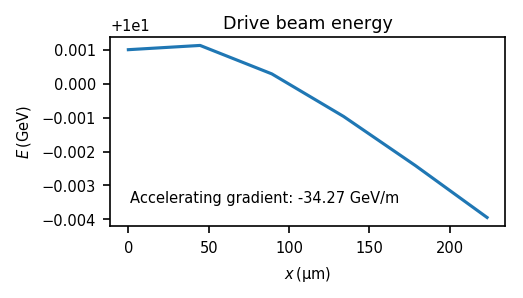

In [3]:
# A better parameter to look at might be the drive beam energy and see how it is being decelerated
path = pathPre + '1e17_100umPlasma/'
species = 'ElectronBeam'
plt.figure(figsize=(3.5,2), dpi=150)
energy = np.zeros(6, dtype='double')
x = np.zeros(6, dtype='double')
for j in range(6):
    file = plot.get_filename(path, simName, species, j)
    data = load.get_species_data(file, species)
    attrs = load.get_species_attrs(file, species)
    energy[j] = analyze.get_energy(data, me*1e-3)
    x[j] = c*attrs['time']
grad = (energy[5]-energy[4]) / (x[5]-x[4])
plt.plot(x*1e6, energy)
plt.title("Drive beam energy")
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$E\,(\mathrm{GeV})$')
plt.text(1, 10-3.5e-3, 'Accelerating gradient: %0.2f GeV/m' % grad)
plt.tight_layout()
plt.show()

Start: 229.00, End: 73.00, Length:156.00
Bottom: 68.43, Top: 180.66, Width:112.23
Wake size in the original plasma, Length: 156.0, Width: 109.49
Beam is denser than original simulation


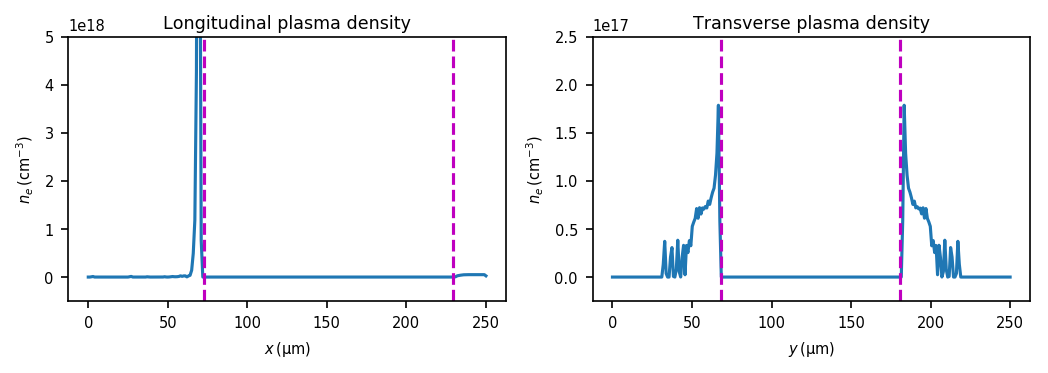

In [4]:
# Plotting the plasma density
path = pathPre + '5e16_150umPlasma/'
rho, rhoAttrs = load.load_field(path, simName, 'rhoPlasma')
Nx, Ny, Nz = analyze.get_shape(rho[5])
rhoX = -rho[5][:, int(Ny+1)/2, int(Nz+1)/2, 0]/e/1e6
rhoY = -rho[5][175, :, int(Nz+1)/2, 0]/e/1e6
x = np.linspace(0, 250, Nx)
y = np.linspace(0, 250, Ny)

length = find_length(rhoX, x, Nx, 1e6)
print('Start: %0.2f, End: %0.2f, Length:%0.2f' % (length[0], length[1], length[0]-length[1]))

widthArr = np.zeros(175, dtype='double')
for i in range(125, 200):
    rhoYi = -rho[5][i, :, int(Nz+1)/2, 0]/e/1e6
    width = find_width(rhoYi, y, Ny, 1e6)
    widthArr[i-150] = width[1]-width[0]
rhoY = -rho[5][np.argmax(widthArr)+150, :, int(Nz+1)/2, 0]/e/1e6
    
width = find_width(rhoY, y, Ny, 1e6)
print('Bottom: %0.2f, Top: %0.2f, Width:%0.2f' % (width[0], width[1], width[1]-width[0]))
print('Wake size in the original plasma, Length: 156.0, Width: 109.49')
print('Beam is denser than original simulation')

plt.figure(figsize=(7,2.5), dpi=150)
gs = gridspec.GridSpec(1, 2)
plt.subplot(gs[0, 0])
plt.plot(x, rhoX)
plt.plot([length[0], length[0]], [-0.5e18, 5e18], 'm--')
plt.plot([length[1], length[1]], [-0.5e18, 5e18], 'm--')
plt.title('Longitudinal plasma density')
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$n_e\,(\mathrm{cm^{-3}})$')
plt.ylim([-0.5e18, 5e18])

plt.subplot(gs[0, 1])
plt.plot(y, rhoY)
plt.title('Transverse plasma density')
plt.plot([width[0], width[0]], [-0.25e17, 2.5e17], 'm--')
plt.plot([width[1], width[1]], [-0.25e17, 2.5e17], 'm--')
plt.xlabel(r'$y\,(\mathrm{\mu m})$')
plt.ylabel(r'$n_e\,(\mathrm{cm^{-3}})$')
plt.ylim([-0.25e17, 2.5e17])
plt.tight_layout()
plt.show()

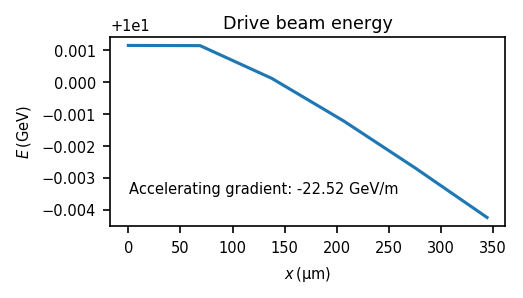

In [5]:
# A better parameter to look at might be the drive beam energy and see how it is being decelerated
path = pathPre + '5e16_150umPlasma/'
species = 'ElectronBeam'
plt.figure(figsize=(3.5,2), dpi=150)
energy = np.zeros(6, dtype='double')
x = np.zeros(6, dtype='double')
for j in range(6):
    file = plot.get_filename(path, simName, species, j)
    data = load.get_species_data(file, species)
    attrs = load.get_species_attrs(file, species)
    energy[j] = analyze.get_energy(data, me*1e-3)
    x[j] = c*attrs['time']
grad = (energy[5]-energy[4]) / (x[5]-x[4])
plt.plot(x*1e6, energy)
plt.title("Drive beam energy")
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$E\,(\mathrm{GeV})$')
plt.text(1, 10-3.5e-3, 'Accelerating gradient: %0.2f GeV/m' % grad)
plt.tight_layout()
plt.show()

Start: 327.60, End: 42.00, Length:285.60
Bottom: 58.03, Top: 241.97, Width:183.94
Wake size in the original plasma, Length: 156.0, Width: 109.49
Beam is denser than original simulation


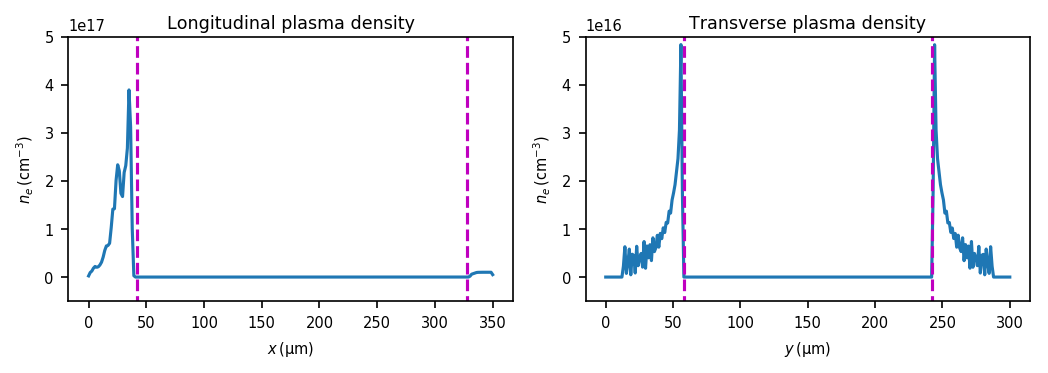

In [6]:
# Plotting the plasma density
path = pathPre + '1e16_200umPlasma/'
rho, rhoAttrs = load.load_field(path, simName, 'rhoPlasma')
Nx, Ny, Nz = analyze.get_shape(rho[5])
rhoX = -rho[5][:, int(Ny+1)/2, int(Nz+1)/2, 0]/e/1e6
rhoY = -rho[5][175, :, int(Nz+1)/2, 0]/e/1e6
x = np.linspace(0, 350, Nx)
y = np.linspace(0, 300, Ny)

length = find_length(rhoX, x, Nx, 1e6)
print('Start: %0.2f, End: %0.2f, Length:%0.2f' % (length[0], length[1], length[0]-length[1]))

def find_width(rhoY, y, Ny, eps):
    for i in range(int(Ny/6), int(5*Ny/6)):
        if rhoY[i] >= eps and rhoY[i+1] < eps:
            start = y[i+1]
        if rhoY[i] <= eps and rhoY[i+1] > eps:
            end = y[i]
            return start, end

widthArr = np.zeros(75, dtype='double')
for i in range(125, 200):
    rhoYi = -rho[5][i, :, int(Nz+1)/2, 0]/e/1e6
    width = find_width(rhoYi, y, Ny, 1e6)
    widthArr[i-150] = width[1]-width[0]
rhoY = -rho[5][np.argmax(widthArr)+150, :, int(Nz+1)/2, 0]/e/1e6

width = find_width(rhoY, y, Ny, 1e6)
print('Bottom: %0.2f, Top: %0.2f, Width:%0.2f' % (width[0], width[1], width[1]-width[0]))
print('Wake size in the original plasma, Length: 294.0, Width: 178.83')
print('Beam is denser than original simulation')

plt.figure(figsize=(7,2.5), dpi=150)
gs = gridspec.GridSpec(1, 2)
plt.subplot(gs[0, 0])
plt.plot(x, rhoX)
plt.plot([length[0], length[0]], [-0.5e18, 5e18], 'm--')
plt.plot([length[1], length[1]], [-0.5e18, 5e18], 'm--')
plt.title('Longitudinal plasma density')
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$n_e\,(\mathrm{cm^{-3}})$')
plt.ylim([-0.5e17, 5e17])

plt.subplot(gs[0, 1])
plt.plot(y, rhoY)
plt.title('Transverse plasma density')
plt.plot([width[0], width[0]], [-0.25e17, 2.5e17], 'm--')
plt.plot([width[1], width[1]], [-0.25e17, 2.5e17], 'm--')
plt.xlabel(r'$y\,(\mathrm{\mu m})$')
plt.ylabel(r'$n_e\,(\mathrm{cm^{-3}})$')
plt.ylim([-0.5e16, 5e16])
plt.tight_layout()
plt.show()

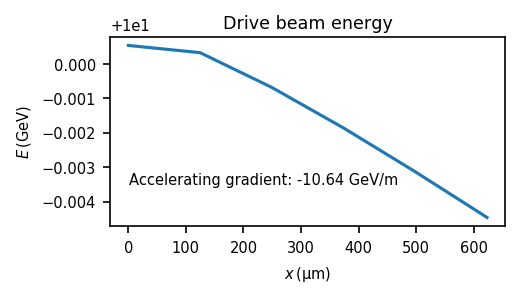

In [7]:
# A better parameter to look at might be the drive beam energy and see how it is being decelerated
path = pathPre + '1e16_200umPlasma/'
species = 'ElectronBeam'
plt.figure(figsize=(3.5,2), dpi=150)
energy = np.zeros(6, dtype='double')
x = np.zeros(6, dtype='double')
for j in range(6):
    file = plot.get_filename(path, simName, species, j)
    data = load.get_species_data(file, species)
    attrs = load.get_species_attrs(file, species)
    energy[j] = analyze.get_energy(data, me*1e-3)
    x[j] = c*attrs['time']
grad = (energy[5]-energy[4]) / (x[5]-x[4])
plt.plot(x*1e6, energy)
plt.title("Drive beam energy")
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$E\,(\mathrm{GeV})$')
plt.text(1, 10-3.5e-3, 'Accelerating gradient: %0.2f GeV/m' % grad)
plt.tight_layout()
plt.show()

Zeros position: 166.465063402
Witness delay: 158.534936598


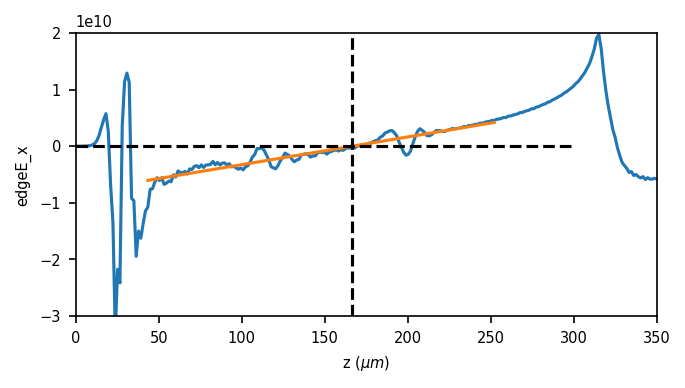

In [30]:
path = pathPre + '1e16_200umPlasma/'
rho, rhoAttrs = load.load_field(path, simName, 'edgeE')
Nx, Ny, Nz = analyze.get_shape(rho[5])
edgeEX = -rho[5][:, int(Ny+1)/2, int(Nz+1)/2, 0]
x = np.flip(np.linspace(0, 350, Nx), 0)

def line(x, m, b):
    return m*x+b

start = 70
end = 220
popt, pcov = curve_fit(line, x[start:end], edgeEX[start:end])
zeroPos = -popt[1]/popt[0]
print('Zeros position:', zeroPos)
print('Witness delay:', 350-zeroPos-25)

plt.figure(figsize=(5,2.5), dpi=150)
plt.plot(x, edgeEX)
plt.plot(x[start:end], line(x[start:end], *popt))
plt.plot([zeroPos, zeroPos], [-3e10, 2e10], 'k--')
plt.plot([0, 300], [0, 0], 'k--')
plt.xlabel(r'z ($\mu m$)')
plt.ylabel('edgeE_x')
plt.xlim(0, 350)
plt.ylim(-3e10, 2e10)
plt.show()